In [7]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import copy
import time
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [8]:
data=pd.read_csv('mnist_train.csv')
idx=np.random.choice(data.index,6000)
data=data.iloc[idx]
data.reset_index(inplace=True)
data.drop(columns='index',inplace=True)
labels=data.iloc[:,0]
data=data.iloc[:, 1:]
dataNorm=data/np.max(data,axis=0)
dataNorm.fillna(0,inplace=True)




In [9]:
dataT=torch.tensor(np.array(dataNorm)).float()
labelsT=torch.tensor(np.array(labels)).long()
# Step 2: use scikitlearn to split the data
# train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)

# # Step 3: convert into PyTorch Datasets
# train_data = torch.utils.data.TensorDataset(train_data,train_labels)
# test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# # Step 4: translate into dataloader objects
# batchsize    = 32
# train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
# test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
     

In [10]:
def createTheMNISTAE():
  class aenet(nn.Module):
    def __init__(self):
      super().__init__()
      
      self.input=nn.Linear(784,250)
      
      self.enc=nn.Linear(250,50)
      
      self.lat=nn.Linear(50,250)
      
      self.dec=nn.Linear(250,784)
      
    def forward(self,x):
      x=F.relu(self.input(x))
      x=F.relu(self.enc(x))
      x=F.relu(self.lat(x))
      y=torch.sigmoid(self.dec(x))
      
      return y
  
  net=aenet()
  lossfun=nn.MSELoss()
  optimizer=torch.optim.Adam(net.parameters(), lr=0.001)
  
  return net,lossfun,optimizer
      
      
      

In [11]:
net,lossfun,optimizer=createTheMNISTAE()
X=dataT[:5,:]
yHat=net(X)
print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


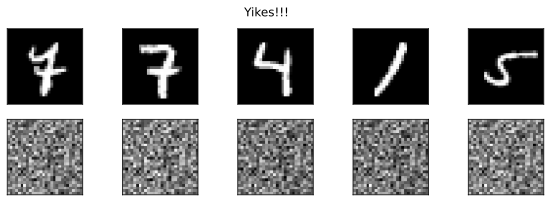

In [12]:

# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Yikes!!!')
plt.show()
     

In [13]:
def function2trainTheModel():
  numepochs=10000
  net,lossfun,optimizer=createTheMNISTAE()
  
  losses=torch.zeros(numepochs)
  
  for epochi in range(numepochs):
    randomidx=np.random.choice(dataT.shape[0],size=32)
    X=dataT[randomidx,:]
    yHat=net(X)
    loss=lossfun(yHat,X)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses[epochi]=loss.item()
    
  return losses,net
    
    

In [14]:
losses,net=function2trainTheModel()

In [15]:
print(f'the final loss is {losses[-1]:.4f}')
 
 

the final loss is 0.0055


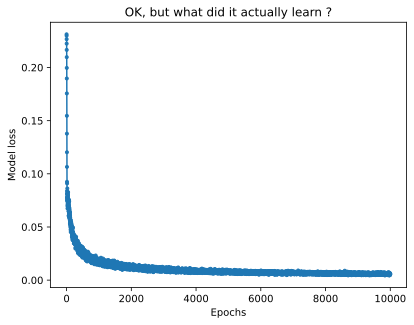

In [16]:
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn ?')
plt.show()

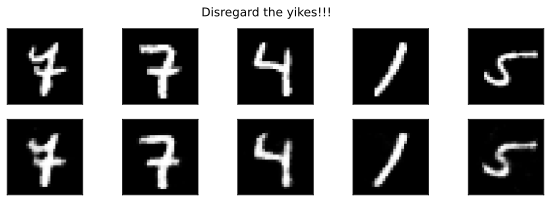

In [17]:

# Repeat the visualization when testing the model
X = dataT[:5,:]
yHat = net(X)


# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Disregard the yikes!!!')
plt.show()

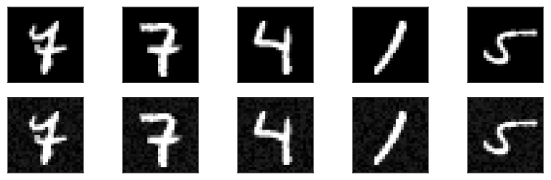

In [23]:

# grab a small set of images
X = dataT[:10,:]

# add noise
Xnoise = X + torch.rand_like(X)/8

# clip at 1
Xnoise[Xnoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.show()
     

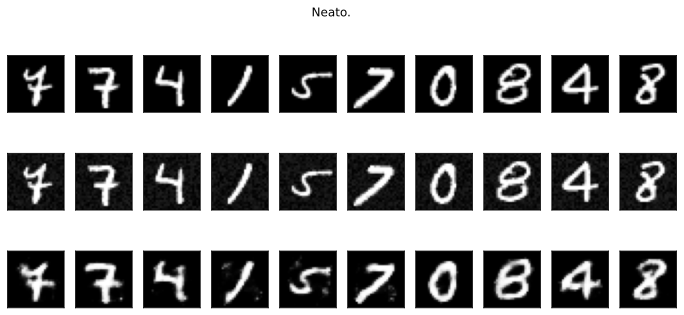

In [24]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.suptitle('Neato.')
plt.show()